# Import libraries

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import os 
import pandas as pd

# Load train & test data

In [2]:
houses=pd.read_csv("train.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houses_test = pd.read_csv("test.csv")
houses_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
houses.shape

(1460, 81)

In [5]:
houses_test.shape

(1459, 80)

 # Variable Identification


In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Heatmap

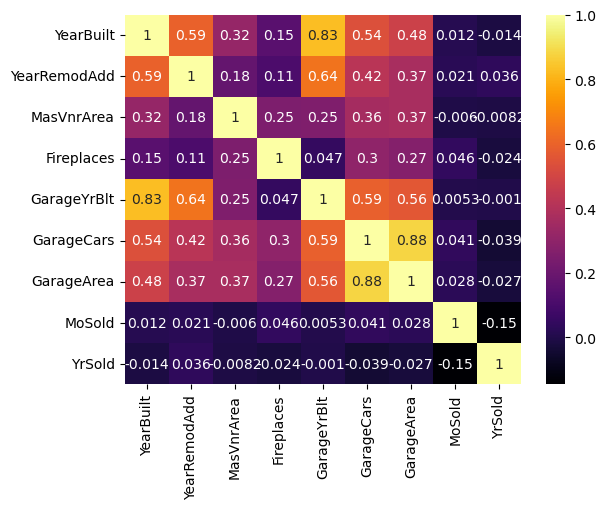

In [13]:

corr = houses[['YearBuilt', 'YearRemodAdd', 'MasVnrArea','Fireplaces','GarageYrBlt','GarageCars','GarageArea','MoSold','YrSold']].corr()
sns.heatmap(corr, annot=True, cmap='inferno')
plt.show()

# Pivotal Features

In [16]:
houses[['OverallQual','SalePrice']].groupby(['OverallQual']).mean().sort_values(by='OverallQual')

,SalePrice
OverallQual,
1,50150.000000
2,51770.333333
3,87473.750000
4,108420.655172
5,133523.347607
6,161603.034759
7,207716.423197
8,274735.535714
9,367513.023256


In [19]:
houses[['GarageCars','SalePrice']].groupby(['GarageCars']).mean().sort_values(by='GarageCars', ascending=True)

,SalePrice
GarageCars,
0,103317.283951
1,128116.688347
2,183851.663835
3,309636.121547
4,192655.800000


In [20]:
houses[['Fireplaces','SalePrice']].groupby(['Fireplaces']).mean().sort_values(by='Fireplaces')

,SalePrice
Fireplaces,
0,141331.482609
1,211843.909231
2,240588.539130
3,252000.000000


# Visualising 

# Beg. Analysis
How single variable is distributed in numeric range.

Text(0.5, 0, 'Sale Price')

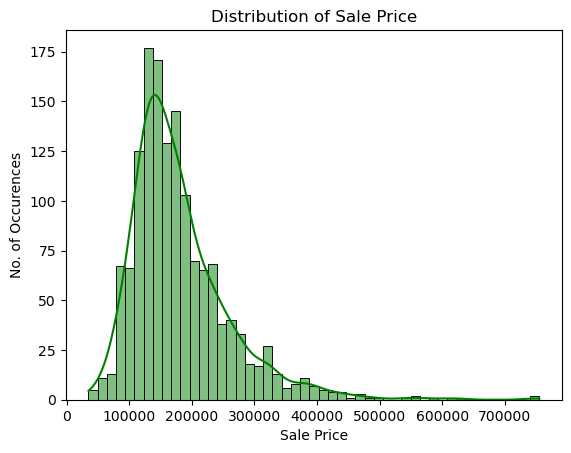

In [153]:
plt.title("Distribution of Sale Price")
sns.histplot(data =houses,x='SalePrice', kde=True, color='green')
plt.ylabel("No. of Occurences")
plt.xlabel("Sale Price")

In [23]:
#skewness  

houses['SalePrice'].skew()

1.8828757597682129

In [24]:
#kurtosis

houses['SalePrice'].kurt()


6.536281860064529

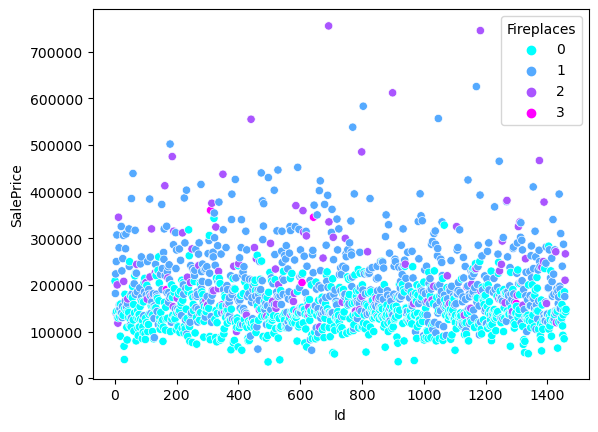

In [30]:

sns.scatterplot(data=houses, x='Id', y='SalePrice', hue='Fireplaces', palette='cool')
plt.xlabel('Id')
plt.ylabel('SalePrice')
plt.show()

# Missing Value Imputation
Missing values in the training data set can affect prediction.

In [31]:
#lets see if there are any columns with missing values 
null_columns=houses.columns[houses.isnull().any()]
houses[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# Analysis 1:

# LotFrontage


In [32]:
houses['LotFrontage'].corr(houses['LotArea'])

0.4260950187718078

In [35]:
 houses['SqrtLotArea']=np.sqrt(houses['LotArea'])

houses['LotFrontage'].corr(houses['SqrtLotArea'])

0.7242125535525784

# MasVnrType and MasVnrArea

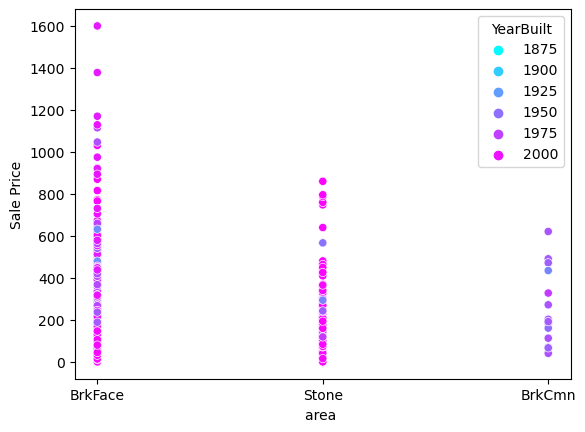

In [50]:
sns.scatterplot(data=houses, x='MasVnrType', y='MasVnrArea',hue ='YearBuilt', palette='cool')
plt.xlabel('area ')
plt.ylabel('Sale Price')
plt.show()

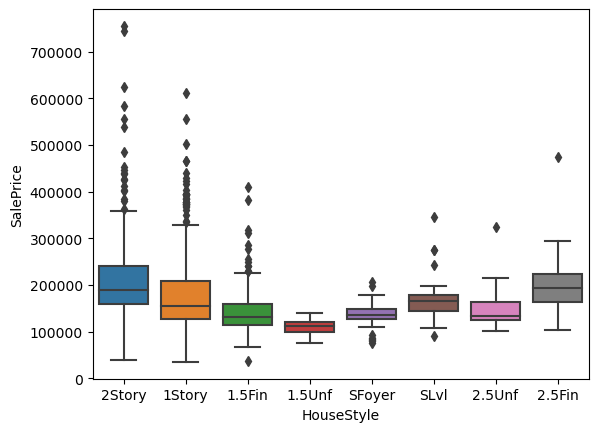

In [51]:
sns.boxplot(x="HouseStyle",y="SalePrice",data=houses)
plt.xlabel('HouseStyle')
plt.ylabel('SalePrice')
plt.show()

In [53]:
houses["MasVnrType"] = houses["MasVnrType"].fillna('None')
houses["MasVnrArea"] = houses["MasVnrArea"].fillna(value = 0.0)

# Analysis 2:

# Electrical

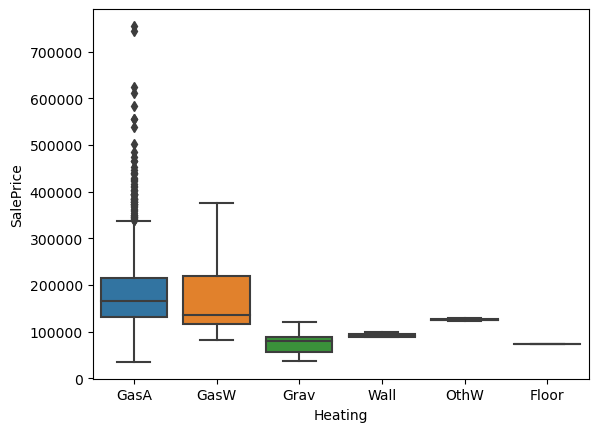

In [57]:
sns.boxplot(x='Heating',y='SalePrice',data=houses)
plt.ylabel("SalePrice")
plt.xlabel("Heating")

In [58]:
houses["MasVnrType"] = houses["MasVnrType"].fillna('BrkCmn')

In [59]:
houses["Alley"] = houses["Alley"].fillna('None')

*Basement Features*
-------------------

Text(0.5, 0, 'Basement area ')

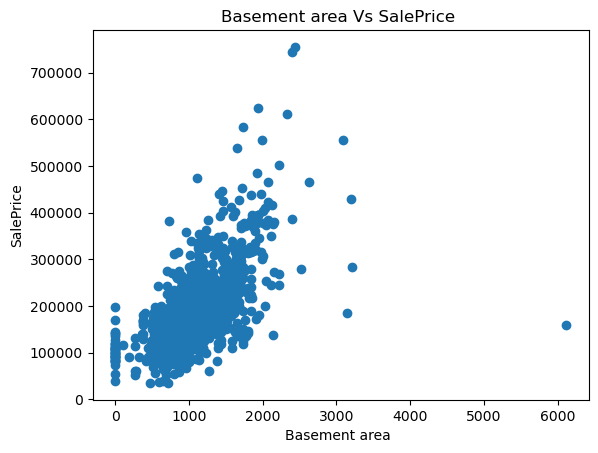

In [152]:
plt.title("Basement area Vs SalePrice ")
plt.scatter(houses["TotalBsmtSF"],houses["SalePrice"])

plt.ylabel("SalePrice")
plt.xlabel("Basement area ")

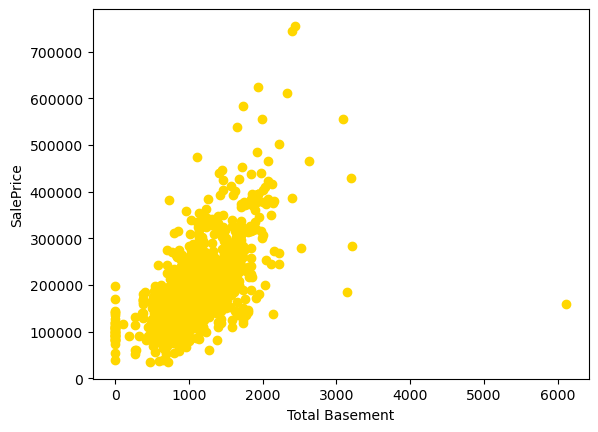

In [65]:

plt.scatter(data = houses, x='TotalBsmtSF', y='SalePrice',color='gold')
plt.ylabel("SalePrice")
plt.xlabel("Total Basement")

In [66]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
houses[basement_cols][houses['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


In [67]:
for col in basement_cols:
    if 'FinSF'not in col:
        houses[col] = houses[col].fillna('None')

In [68]:
houses[basement_cols][houses['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2


*Garages*
---------

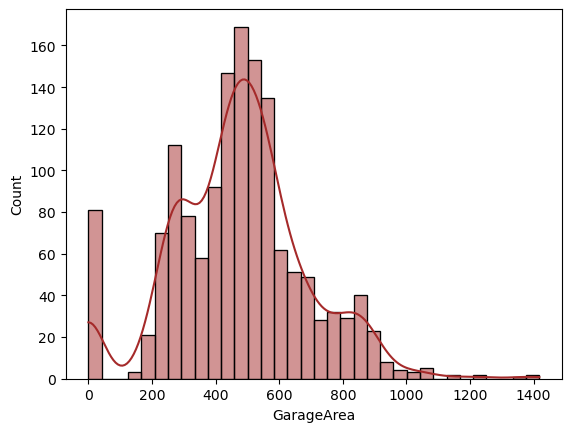

In [76]:
sns.histplot(data = houses,x='GarageArea',color='brown', kde=True)
plt.xlabel('GarageArea')
plt.ylabel('Count')
plt.show()

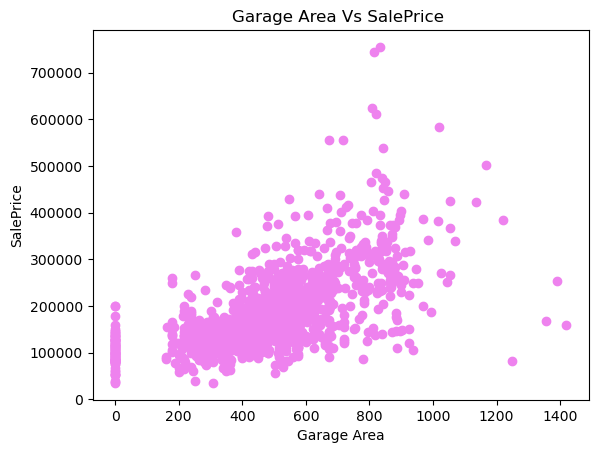

In [81]:

plt.scatter(data =houses , x='GarageArea', y='SalePrice',color='violet')
plt.title("Garage Area Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Garage Area")

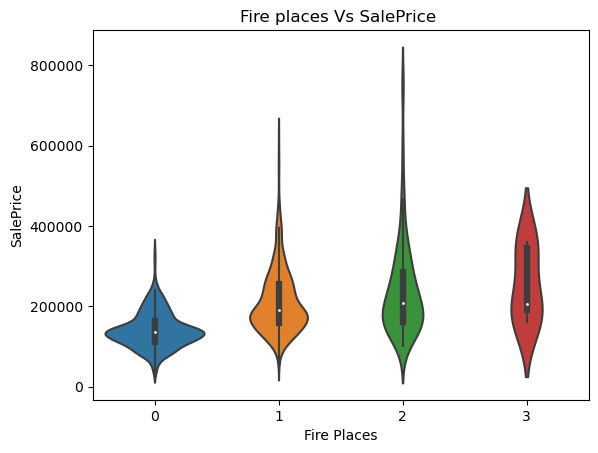

In [86]:
sns.violinplot(data =houses,x='Fireplaces', y='SalePrice')
plt.title("Fire places Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Fire Places")

*Pool*
-----------------------

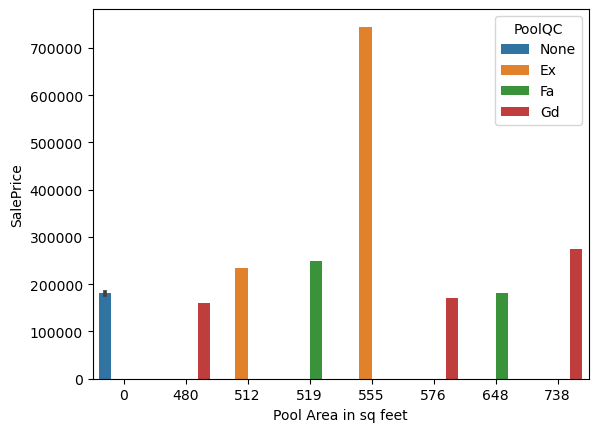

In [94]:

sns.barplot(data =houses,x='PoolArea',y='SalePrice',hue='PoolQC')
plt.ylabel("SalePrice")
plt.xlabel("Pool Area in sq feet")

# Fence

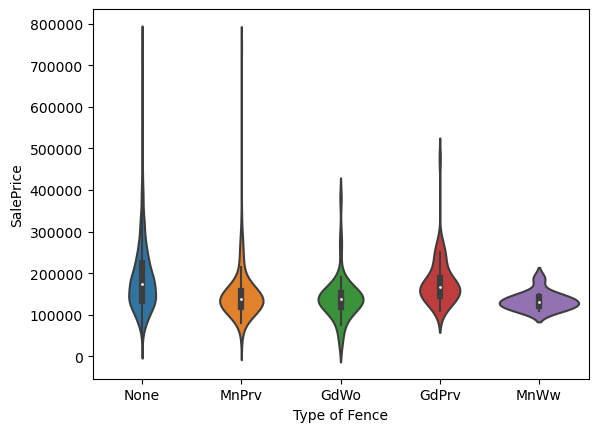

In [100]:
sns.violinplot(data = houses ,x='Fence',y='SalePrice')
plt.ylabel("SalePrice")
plt.xlabel("Type of Fence")
plt.show()

In [98]:
houses['Fence'].nunique()

4

In [99]:
houses["Fence"] = houses["Fence"].fillna('None')

*MiscFeature*
-----------------------

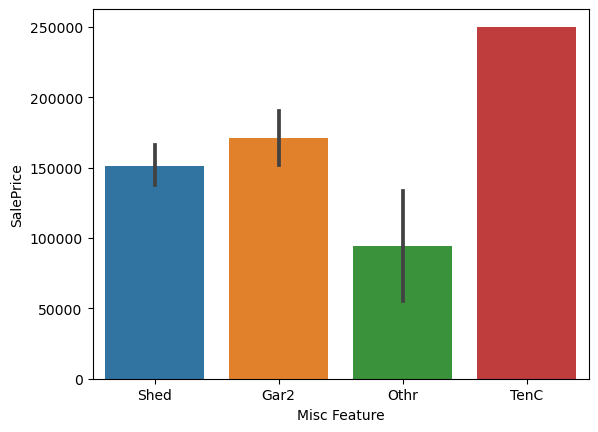

In [102]:
sns.barplot(data =houses,x='MiscFeature',y='SalePrice')
plt.ylabel("SalePrice")
plt.xlabel("Misc Feature")
plt.show()

**Visualizations**
==================

*MSZoning*
-----------

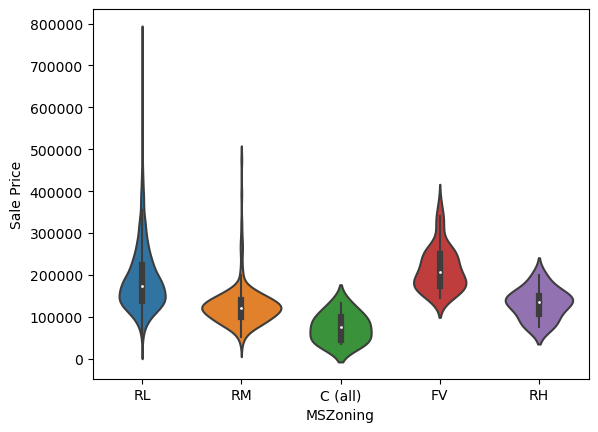

In [103]:

sns.violinplot(data =houses,x='MSZoning',y='SalePrice')
plt.xlabel("MSZoning")
plt.ylabel("Sale Price")
plt.show()

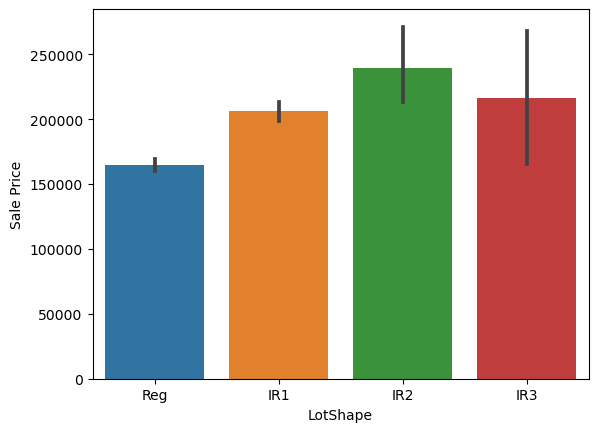

In [120]:
sns.barplot(data =houses,x='LotShape',y='SalePrice')
plt.xlabel("LotShape")
plt.ylabel("Sale Price")
plt.show()

# 1st Floor in square feet

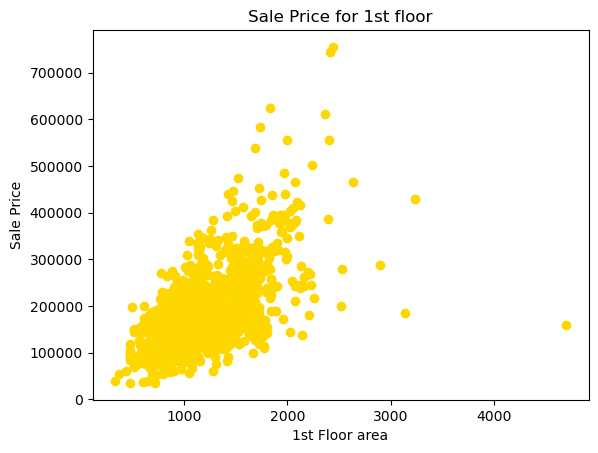

In [126]:
plt.title("Sale Price for 1st floor")
plt.scatter(data = houses, x='1stFlrSF', y='SalePrice', color='gold')
plt.ylabel('Sale Price')
plt.xlabel("1st Floor area")

*Ground Living Area w.r.t SalePrice*
--------------------

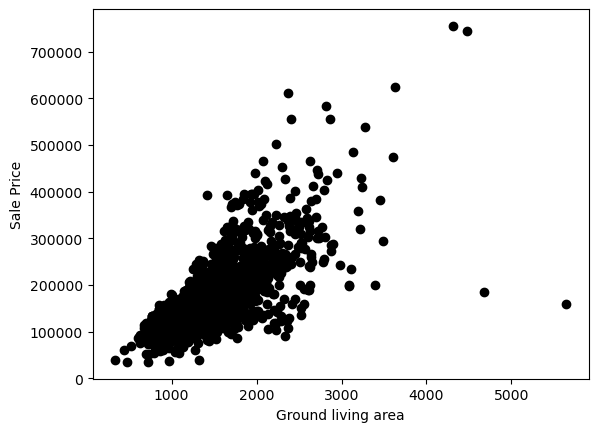

In [131]:
plt.scatter(data = houses,x='GrLivArea',y='SalePrice',color='black')
plt.ylabel('Sale Price')
plt.xlabel("Ground living area")

# SalePrice per square foot

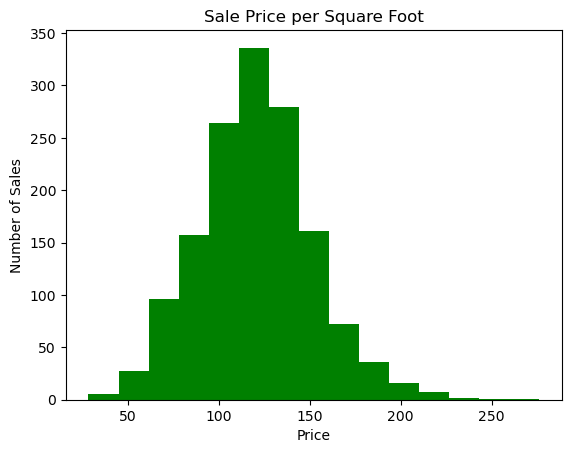

In [135]:
# find sale price
houses['SalePriceSF'] = houses['SalePrice']/houses['GrLivArea']
# plotting 
plt.hist(data =houses,x='SalePriceSF', bins=15,color="green")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price')

# Garage Area

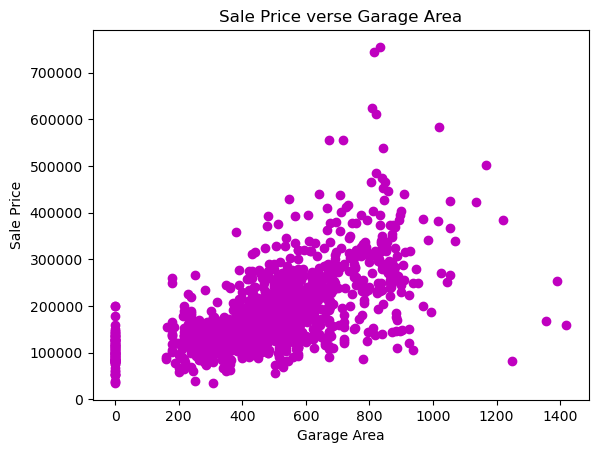

In [137]:
plt.title("Sale Price verse Garage Area")
plt.scatter(data =houses,x='GarageArea',y='SalePrice', color='m')
plt.ylabel('Sale Price')
plt.xlabel("Garage Area")

# Building , remodelling years 

<Axes: xlabel='YearBuilt', ylabel='Count'>

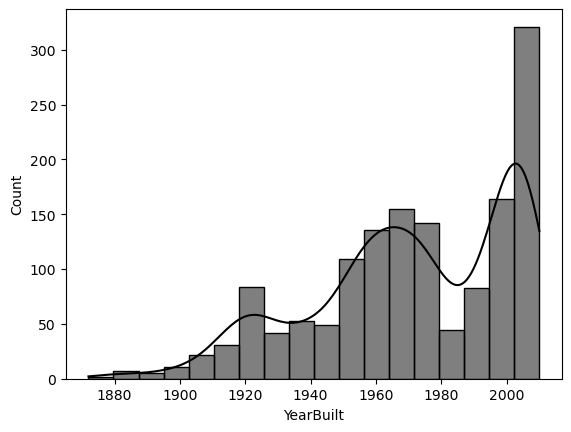

In [147]:
sns.histplot(data =houses,x='YearBuilt',color='k', kde=True)

<Axes: xlabel='YearRemodAdd', ylabel='Count'>

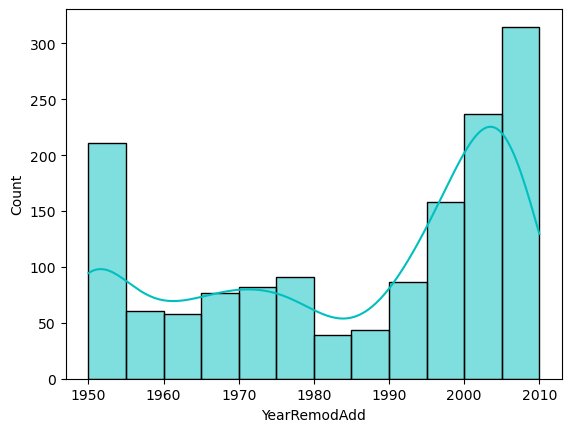

In [151]:
sns.histplot(houses["YearRemodAdd"],color='c', kde=True)


# Bathrooms in house

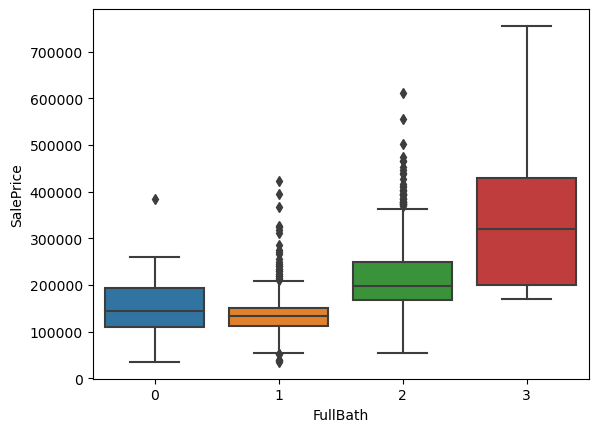

In [142]:
sns.boxplot(data =houses,x='FullBath',y='SalePrice')
plt.show()

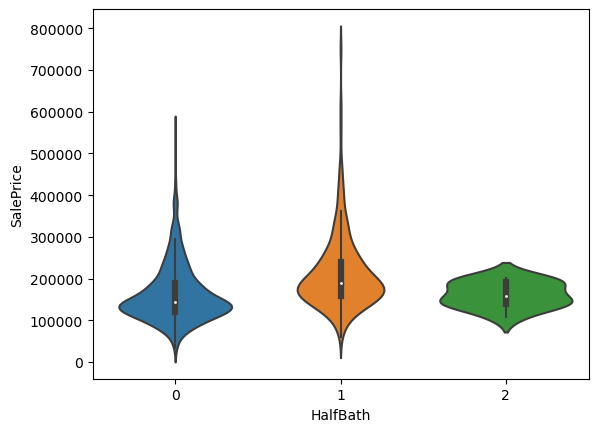

In [163]:
sns.violinplot(data = houses,x='HalfBath',y='SalePrice')
plt.show()

# Total rooms above grade

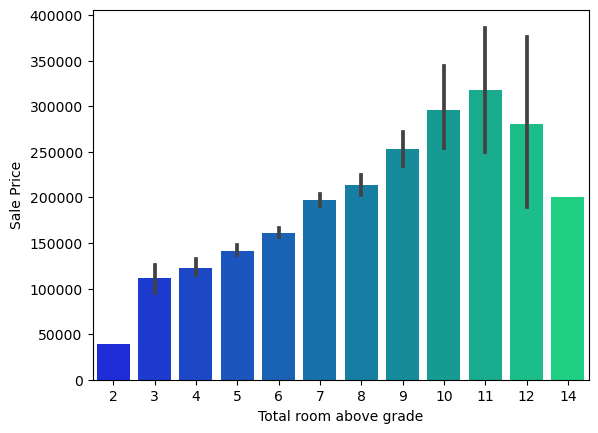

In [165]:
sns.barplot(data = houses,x='TotRmsAbvGrd',y='SalePrice',palette='winter')
plt.xlabel('Total room above grade')
plt.ylabel('Sale Price')
plt.show()

# Kitchen Quality

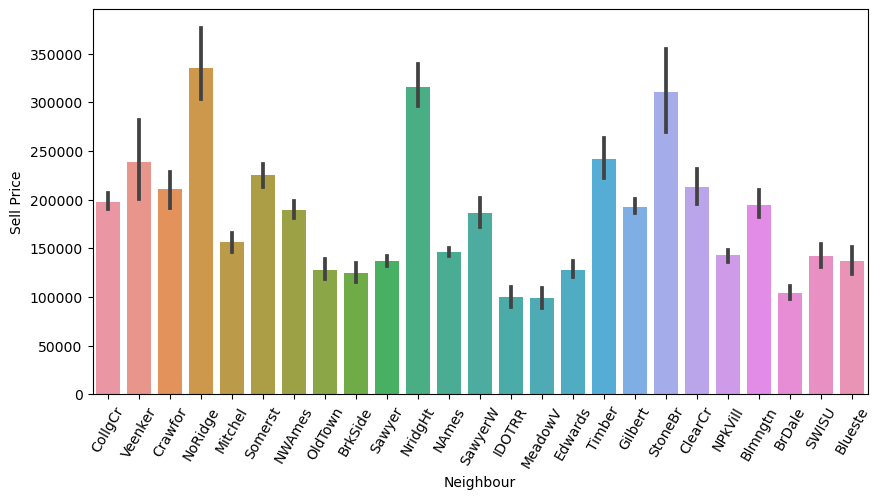

In [174]:
plt.figure(figsize=(10,5)) 
sns.barplot(data =houses,x='Neighborhood',y='SalePrice')
plt.xlabel('Neighbour')
plt.ylabel('Sell Price')
plt.xticks(rotation=60)
plt.show()